<a href="https://colab.research.google.com/github/sj123r/Machine-Learning/blob/main/%EA%B0%9D%EC%B2%B4%EC%A7%80%ED%96%A5_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np

class Perceptron(object):
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    #퍼셉트론 초기화 과정. 학습률, 편향, epoch이 해당.
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)                 #RandomState를 고정해서 같은 난수 생성
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      #epoch은 매개변수로 선언.
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi)) #실제 값과 예측 값의 차이에 학습률 적용
        self.w_[1:] += update * xi 
        self.w_[0] += update
        errors += int(update != 0.0) # Boolean을 int로 치환. True --> 1
      self.errors_.append(errors) #for문에 들어가 있지 않고 밖에 있는 이유는 결국에는 각 epoch마다 에러가 몇번 일어났는지 확인하기 위함.
    
    return self

  ''' 
  가우시안 distribution을 통한 랜덤한 가중치들 생성. 
  난수로 만들어진 데이터셋을 굳이 normal distribution 형태로
  하는 이유는 바로 머신러닝 모델의 학습을 위해서다.
  학습의 속도를 높일 수 있다. 
  '''

  ''' 
  학습률이 크면 가중치가 크게 변경돼 굳이 epoch를 많이 안 돌려도 된다.
  하지만 너무 크면 overshooting(zig-zag으로 움직이는) 현상이 일어날 수도 있다.
  반대로 너무 작으면 변화가 거의 없거나 gradient descent의 대상이 되는 데이터셋에 포함된
  노이즈 때문에 정확성에 문제가 생길 수도 있다.
  '''

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def predict(self, X):
    #input을 activation function(여기서는 스텝 함수)을 통해 출력.
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [18]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')

print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

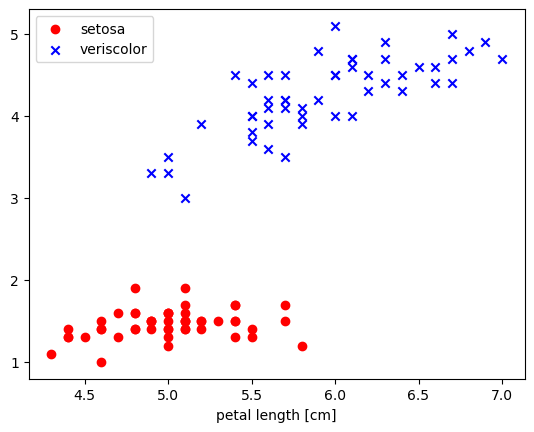

In [20]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='veriscolor')
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

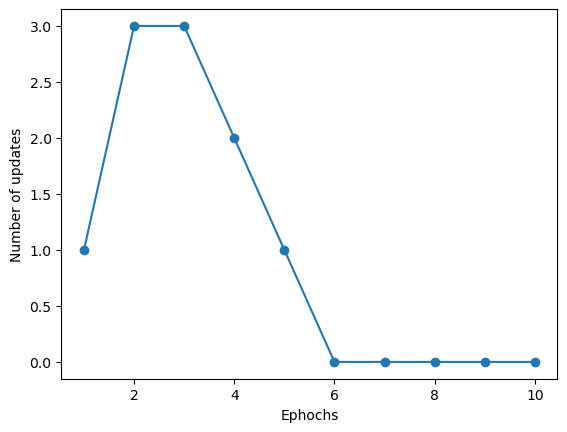

In [21]:
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) +1), ppn.errors_, marker='o')
plt.xlabel('Ephochs')
plt.ylabel('Number of updates')
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid